<a href="https://colab.research.google.com/github/evany24/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 2**<br>
Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

Deleted unnecessary columns.
Deleted duplicate rows.
Identified and addressed missing values.
Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
Produced univariate visuals for the target and all features.
Identified outliers.
Clearly commented all of your cleaning steps and described any decisions you made.
Commit your file to your Github repository and submit the link below. 

#Stroke Dataset

## About the Dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
- 1) id: unique identifier
- 2) gender: "Male", "Female" or "Other"
- 3) age: age of the patient
- 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- 6) ever_married: "No" or "Yes"
- 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) Residence_type: "Rural" or "Urban"
- 9) avg_glucose_level: average glucose level in blood
- 10) bmi: body mass index
- 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
 - *Note: "Unknown" in smoking_status means that the information is unavailable for this patient
- 12) stroke: 1 if the patient had a stroke or 0 if not


*   Source: Kaggle Stroke Prediction Dataset
*   Data: [Stroke Prediction CSV](https://github.com/evany24/Stroke-Prediction/blob/main/healthcare-dataset-stroke-data.csv)



**Target:** Stroke or no stroke

**What does one row represent?** A person

**Is this a classification or regression problem?** Classification

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import numpy
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df_stroke = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**How many features does the data have? How many rows?**

In [3]:
#display rows and columns
df_stroke.shape
print(f'There are {df_stroke.shape[0]} rows and {df_stroke.shape[1]} columns')
print(f'The {df_stroke.shape[0]} rows represent the data values of the features and target.\nThe columns represent {df_stroke.shape[1]-1} features and the target stroke.')

There are 5110 rows and 12 columns
The 5110 rows represent the data values of the features and target.
The columns represent 11 features and the target stroke.


In [4]:
#target column numbers
df_stroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [5]:
#missing values
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#duplicates
df_stroke.duplicated().sum()

0

**What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?** 
- There weight for the target column is highly favorable to the 0 or no stroke. This will present a challenge to try and balance the data to get the best model to predict a stroke. We will also have to deal with the missing values in the bmi column.

## Clean Data

### Delete unnecessary columns


id is unnecessary to keep for our purposes, there are too many unique values

In [7]:
# drop id column
df_stroke.drop(['id'], axis=1, inplace=True)

- The id column has been removed

### **Inspect Column Datatypes for Errors**

In [8]:
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
## Display column names and datatypes
df_stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

- The datatypes for each column match the data dictionary

### **Inspect Column Names for Errors**

In [10]:
## Display column names
df_stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- We will rename 'Residence_type' to 'residence_type' to match the other column names.


In [11]:
#rename Residence_type column
df_stroke.rename(columns = {'Residence_type':'residence_type'}, inplace = True)

In [12]:
#check changes
df_stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- All column types are now consistent

### **Inspect Values for Errors**

#### **Numeric Columns**

In [13]:
# View the numberic statistics for columns contain numberical values
df_stroke.describe(include="number")

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- .80 seems like a low value for age but let's look into it

Locate rows with age values equal to .80

In [14]:
# display rows with age equal to .08
df_stroke[df_stroke['age'] == .08]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


Check other age values to see if there are similar low values

In [15]:
# create a filter for age being less than 1
stroke_age = df_stroke['age'] < 1
df_stroke[stroke_age]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


- There are many rows where age values less than 1. We now know that this is not inconsistent numerical data.

**All the numerical data is consistent**

#### Categorical Columns

In [16]:
#Display object columns
dtypes = df_stroke.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')

In [17]:
#Display values for object columns
for col in str_cols:
    print(f"- Column= {col}")
    print(df_stroke[col].value_counts(dropna=False))
    print('\n\n')

- Column= gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



- Column= ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64



- Column= work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



- Column= residence_type
Urban    2596
Rural    2514
Name: residence_type, dtype: int64



- Column= smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64





Let us change the naming convention for 'work type' so that all values start with a capital letter

In [18]:
# change children to Children
df_stroke['work_type'].replace({'children':'Children'}, inplace=True)
df_stroke['work_type'].value_counts()

Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Change the naming convention for 'smoking_status' values to start with a capital letter and use an underscore for spaces.

In [19]:
# change never smoked to Never_smoked, formerly smoked to Formerly_smoked and smokes to Smokes
df_stroke['smoking_status'].replace({'never smoked':'Never_smoked', 'formerly smoked':'Formerly_smoked', 'smokes':'Smokes'}, inplace=True)
df_stroke['smoking_status'].value_counts()

Never_smoked       1892
Unknown            1544
Formerly_smoked     885
Smokes              789
Name: smoking_status, dtype: int64

Recheck object columns

In [20]:
#Display values for object columns
for col in str_cols:
    print(f"- Column= {col}")
    print(df_stroke[col].value_counts(dropna=False))
    print('\n\n')

- Column= gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



- Column= ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64



- Column= work_type
Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



- Column= residence_type
Urban    2596
Rural    2514
Name: residence_type, dtype: int64



- Column= smoking_status
Never_smoked       1892
Unknown            1544
Formerly_smoked     885
Smokes              789
Name: smoking_status, dtype: int64





- Categorical values are now consistent

### Check for duplicate rows

In [21]:
#check for duplicates
df_stroke.duplicated().sum()

0

- There are no duplicate values

### Check for missing values

In [22]:
#missing values
df_stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
#Check the % of missing values for each column.
df_stroke.isna().sum() / df_stroke.shape[0]

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

* The rows that are missing values in the bmi column are less than 4%. These values represent less than 5 percent of the data so we can drop these rows.

In [24]:
#Drop rows with missing values
df_stroke.dropna(inplace=True)

In [25]:
# numeric columns
df_stroke.describe(include="number")

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Exploratory Data Analysis

#### Univariate Models

##### Numeric Columns

###### **Age**

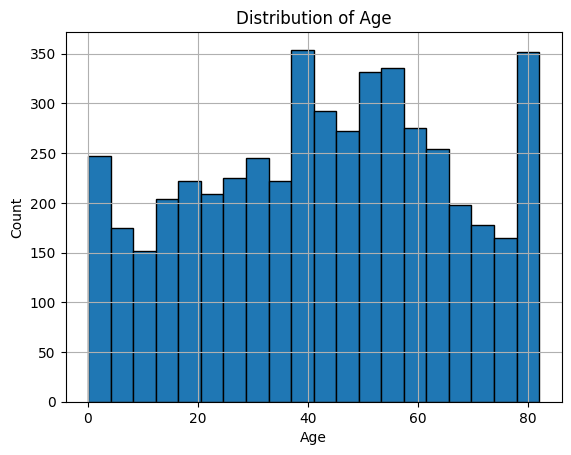

In [26]:
# Histogram of Age
ax = df_stroke['age'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count');

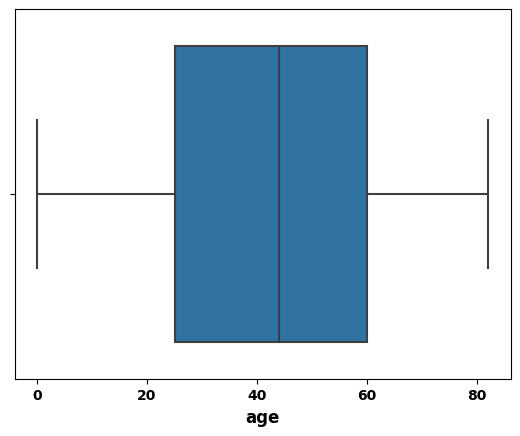

In [27]:
# seaborn box plot for avg_glucose_level
ax = sns.boxplot(data = df_stroke,
                 x = 'age')
ax.set_xlabel('age', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

- Age is pretty evenly distributed and doesn't show any major outliers

###### **Hypertension**

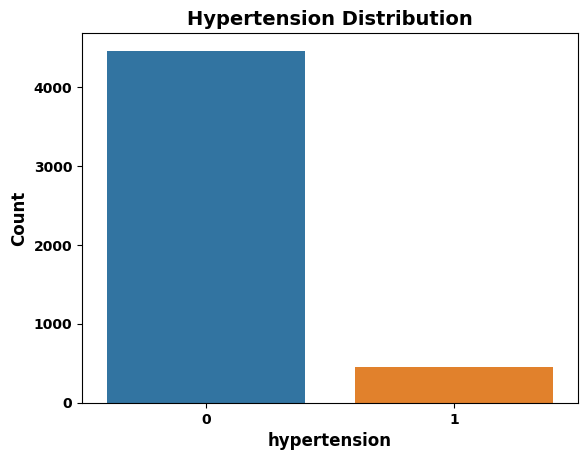

In [28]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='hypertension')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('hypertension', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Hypertension Distribution', fontsize = 14, weight = 'bold');

- This is a binary column so it only has values of 0 and 1

###### Heart Disease

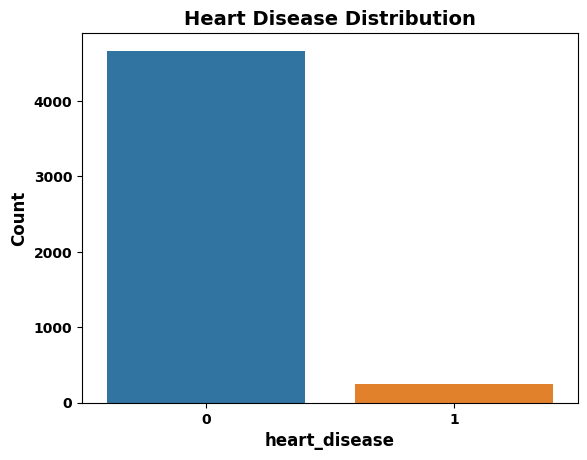

In [29]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='heart_disease')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('heart_disease', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Heart Disease Distribution', fontsize = 14, weight = 'bold');

- This is a binary column so it only has values of 0 and 1

###### **Avg Glucose Level**

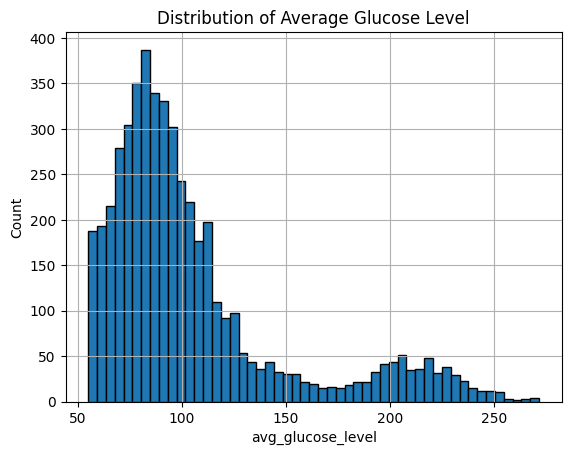

In [30]:
# Histogram of avg_glucose_level
ax = df_stroke['avg_glucose_level'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Average Glucose Level')
ax.set_xlabel('avg_glucose_level')
ax.set_ylabel('Count');

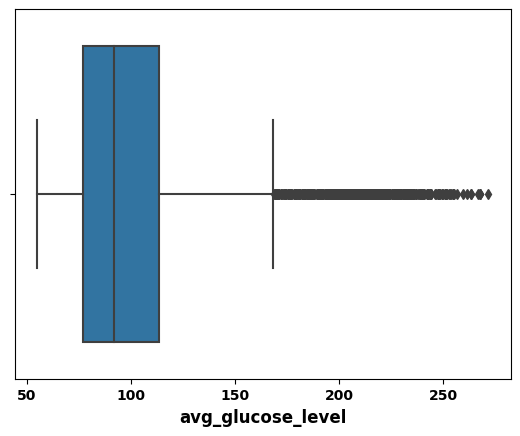

In [31]:
# seaborn box plot for avg_glucose_level
ax = sns.boxplot(data = df_stroke,
                 x = 'avg_glucose_level')
ax.set_xlabel('avg_glucose_level', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

- The distribution of avg glucose level is between around 50 and 165. There are many outliers above the 165/170 values.

###### **BMI**

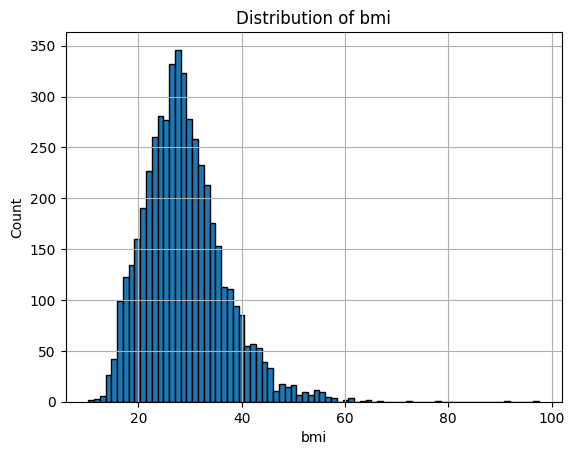

In [32]:
# Histogram of bmi
ax = df_stroke['bmi'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of bmi')
ax.set_xlabel('bmi')
ax.set_ylabel('Count');

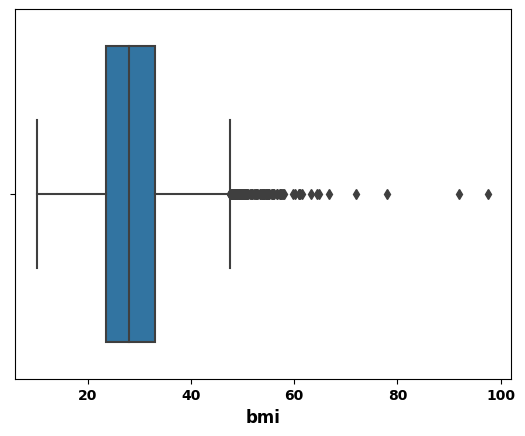

In [33]:
# seaborn box plot for BMI
ax = sns.boxplot(data = df_stroke,
                 x = 'bmi')
ax.set_xlabel('bmi', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold');

-The distribution of bmi is relatively balanced over the 10 to 60 values. There are very low values or outliers as you approach values over 50.

###### **Stroke 'Target'**

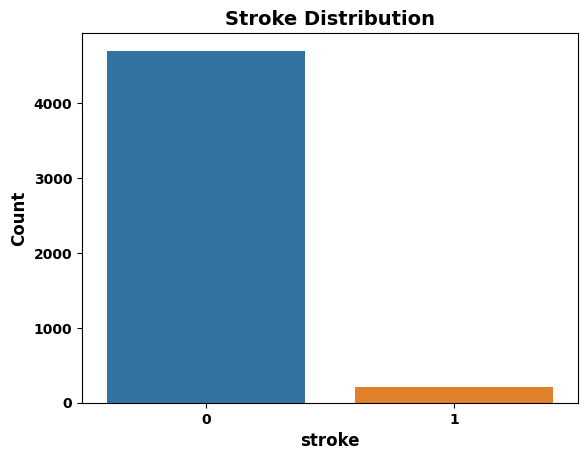

In [34]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='stroke')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('stroke', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Stroke Distribution', fontsize = 14, weight = 'bold');

- We can see that the target that we are trying to predict is unbalanced in favor of 1 which the patient having a stroke. We will have to account for this imbalance in our models

##### Categorical Columns

###### **Gender**

In [35]:
df_stroke['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

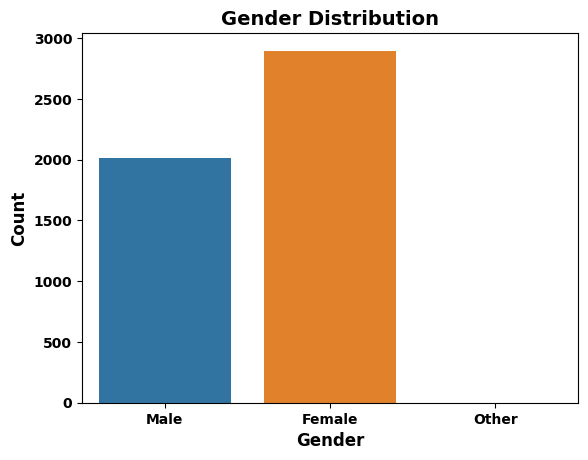

In [36]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='gender')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Gender', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Gender Distribution', fontsize = 14, weight = 'bold');          

###### **Ever Married**

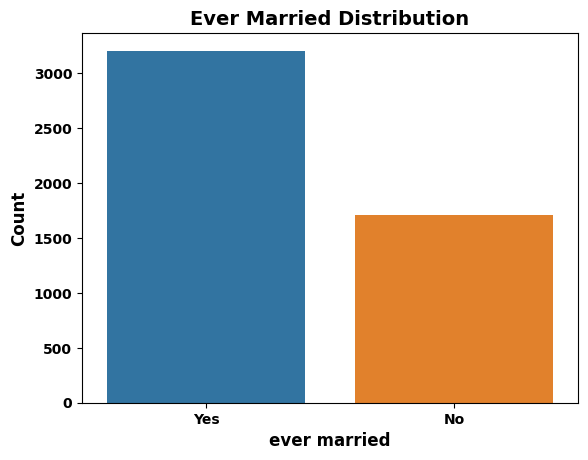

In [37]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='ever_married')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('ever married', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Ever Married Distribution', fontsize = 14, weight = 'bold');  

###### **Work Type**

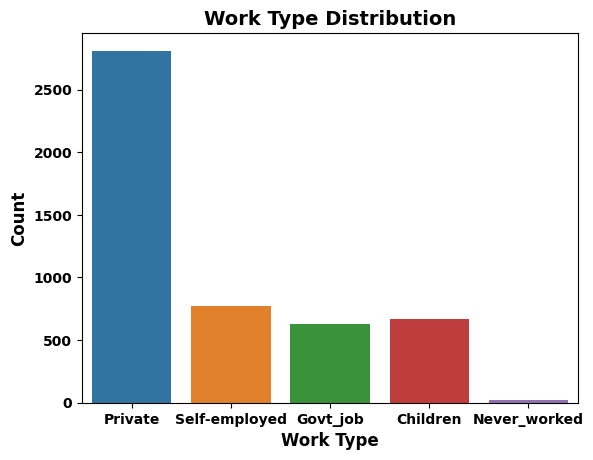

In [38]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='work_type')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Work Type', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Work Type Distribution', fontsize = 14, weight = 'bold');  

###### **Residence Type**

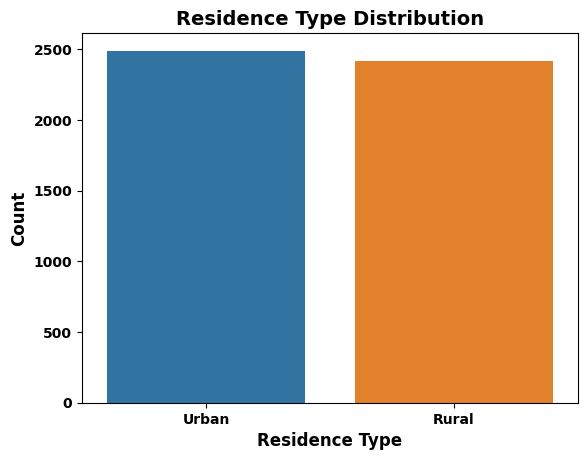

In [39]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='residence_type')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Residence Type', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
# Set Title
ax.set_title('Residence Type Distribution', fontsize = 14, weight = 'bold');  

###### **Smoking Status**

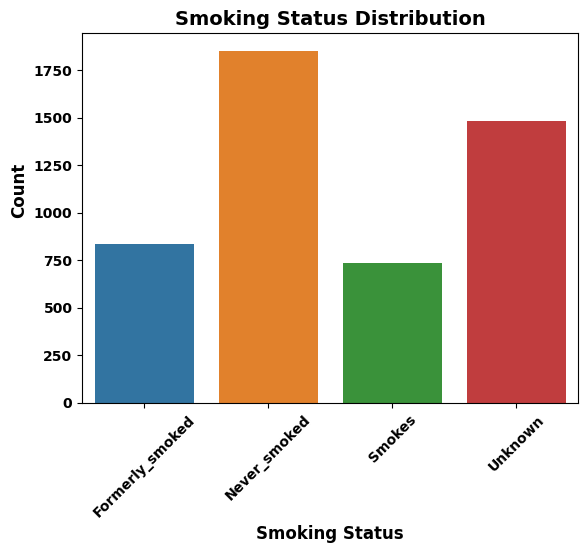

In [40]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df_stroke, 
                   x='smoking_status')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax.set_xlabel('Smoking Status', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold', ha='left')
plt.xticks(fontsize=10, weight='bold', rotation = 45)
# Set Title
ax.set_title('Smoking Status Distribution', fontsize = 14, weight = 'bold');  

#### Multivariate Models

In [41]:
# Make a dictionary with key and value pairs and to replace values with binary 0 and 1
dict = {"No": 0, "Yes": 1}
df_stroke.replace({'stroke': dict}, inplace = True)
df_stroke.replace({'hypertension': dict}, inplace=True)
df_stroke.replace({'ever_married': dict}, inplace=True)

In [42]:
df_stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

##### Numerical Features

###### Correlation Heat Map

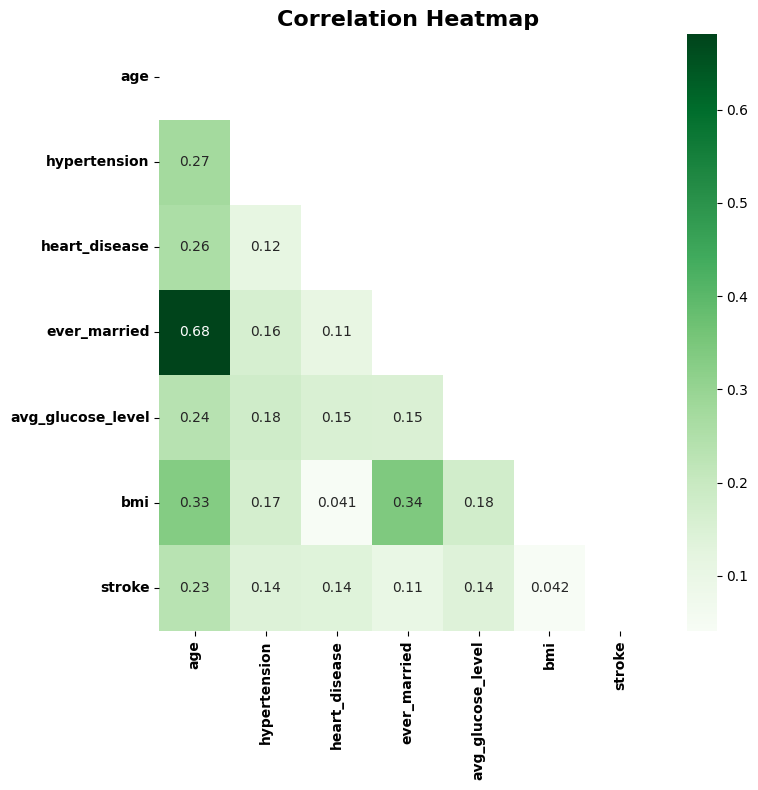

In [43]:
# seaborn heatmap
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (8, 8))
corr = df_stroke.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap= 'Greens', annot = True, mask = mask);

plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold')

plt.tight_layout()
plt.show;

- Age has the strongest positive correlation to stroke.

###### Bar Plot

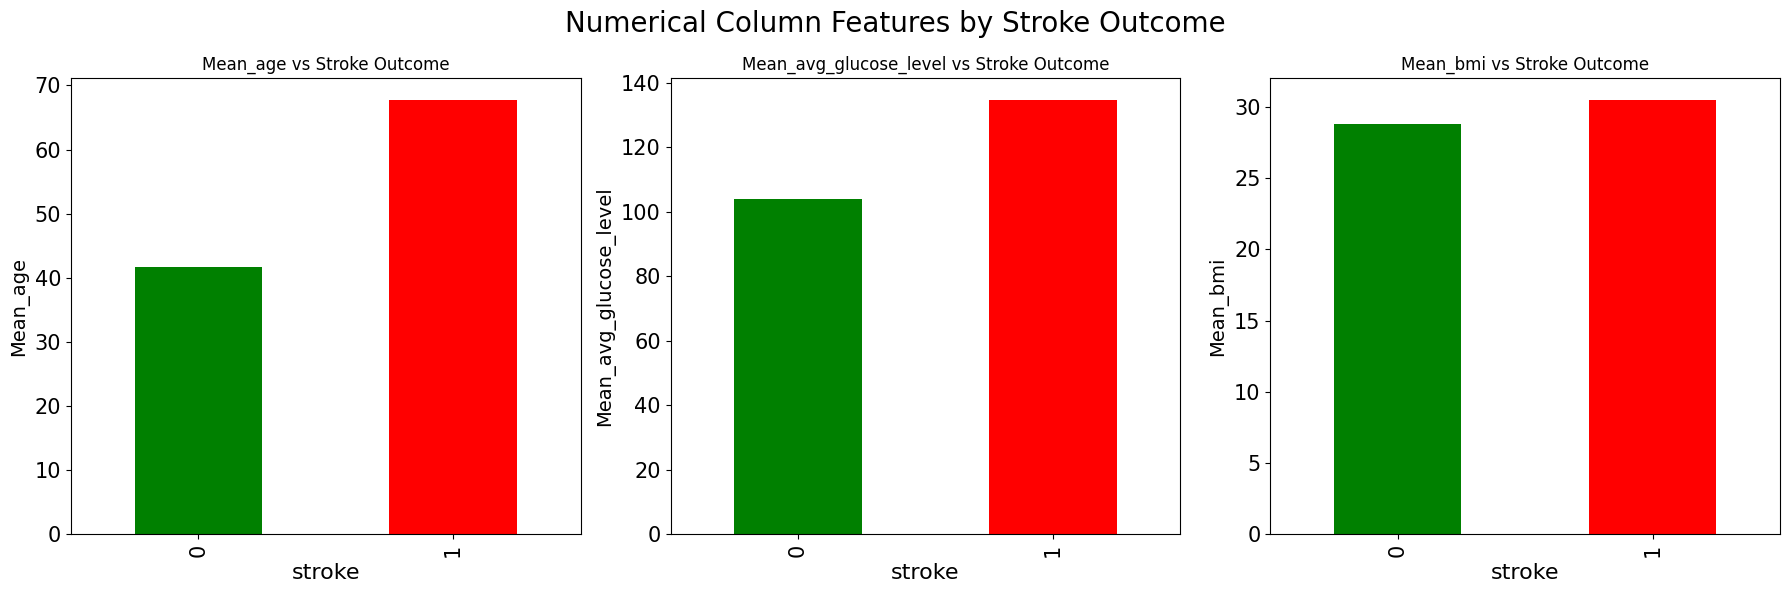

In [44]:
# create side by side plots for numerical float columns grouped with stroke
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
for i, c in enumerate(['age', 'avg_glucose_level', 'bmi',]):
    df_stroke.groupby('stroke')[c].mean().plot(kind='bar', ax=axes[i], color=('green', 'red'))
    axes[i].set_ylabel(f'Mean_{c}', fontsize=14)
    axes[i].set_xlabel('stroke', fontsize=16)
    axes[i].set_title(f'Mean_{c} vs Stroke Outcome')
    axes[i].tick_params(axis='both', which='major', labelsize=15)
fig.suptitle('Numerical Column Features by Stroke Outcome', size = 20)
plt.tight_layout();

- The first plot shows what we observed in the heatmap. Older people have a higher chance of having strokes.
- The second plot shows that people who have a higher average glucose level are more prone to strokes but the the correlation is not as strong as age.
- The third plot shows that BMI does not have a strong correlation with stroke outcome.

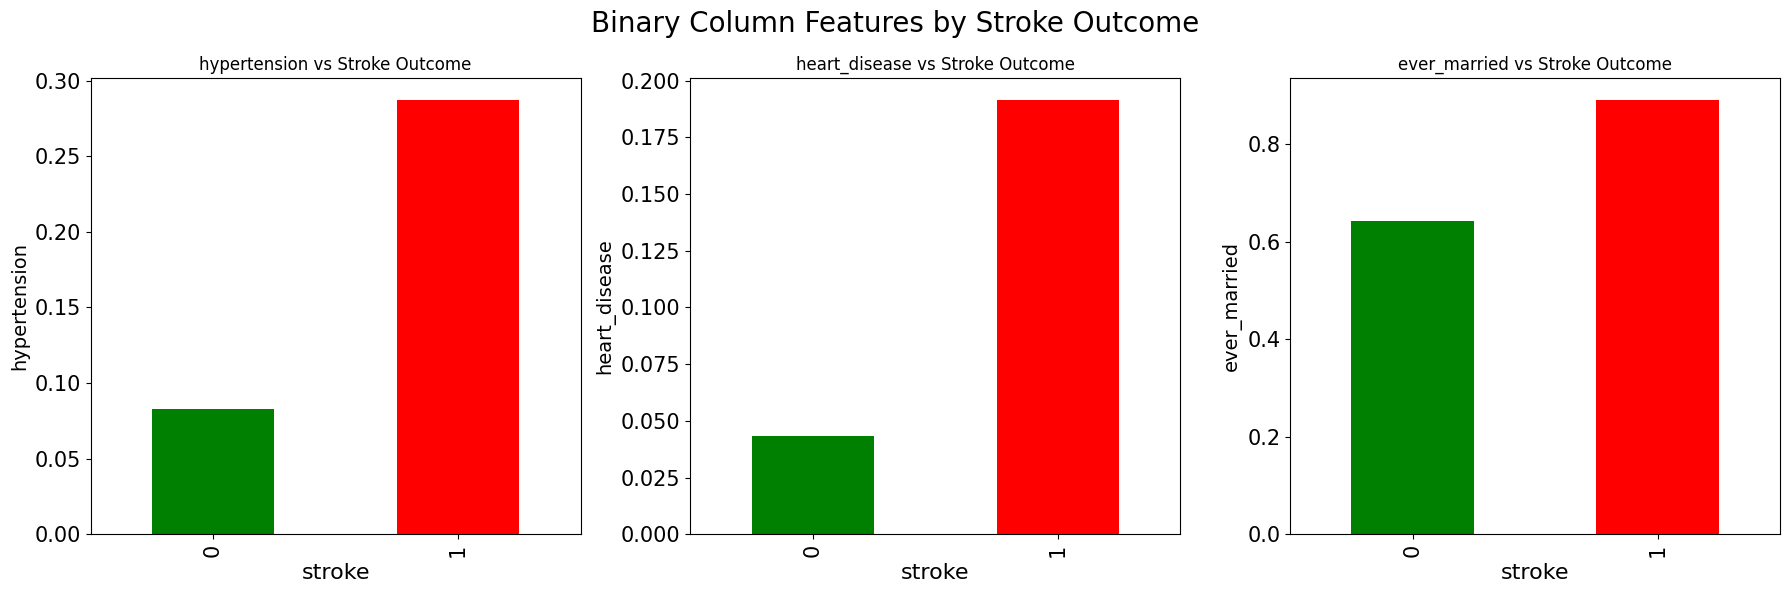

In [45]:
# create side by side plots for numerical float columns grouped with stroke
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
for i, c in enumerate(['hypertension', 'heart_disease', 'ever_married']):
    df_stroke.groupby('stroke')[c].mean().plot(kind='bar', ax=axes[i], color=('green', 'red'))
    axes[i].set_ylabel(f'{c}', fontsize=14)
    axes[i].set_xlabel('stroke', fontsize=16)
    axes[i].set_title(f'{c} vs Stroke Outcome')
    axes[i].tick_params(axis='both', which='major', labelsize=15)
fig.suptitle('Binary Column Features by Stroke Outcome', size = 20)
plt.tight_layout();

- The barplot shows us that people who have hypertension have a higher incidence of stroke
- People who have heart disease are more likely to have a stroke
- It also appears that people who have never been married have less instance of having strokes.

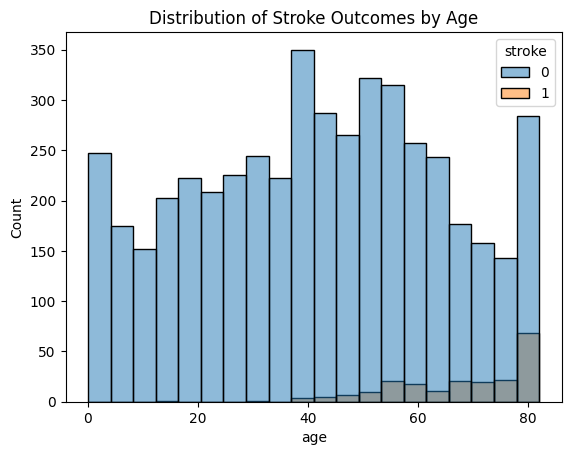

In [46]:
# create seaborn histogram for age distribution with stroke outcome as hue
ax = sns.histplot(data=df_stroke, x='age', edgecolor = 'black', hue='stroke')
ax.set_title("Distribution of Stroke Outcomes by Age");

###### Histograms

###### Regplot

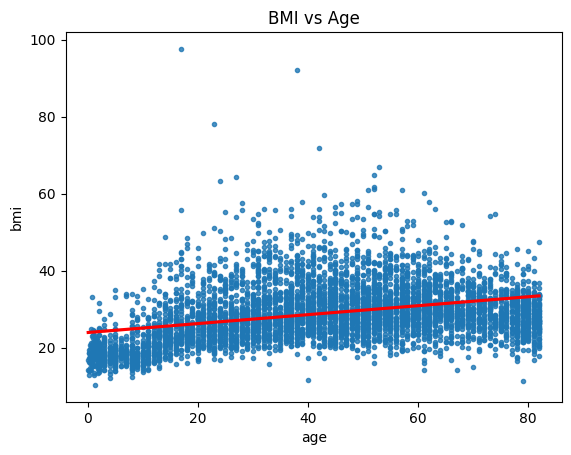

In [47]:
# Look at correlation between age and bmi
ax = sns.regplot(x='age', y='bmi', data= df_stroke, line_kws = {'color' : 'red'}, marker='.').set(title = "BMI vs Age")

- There is a minor positive correlation between BMI and Age

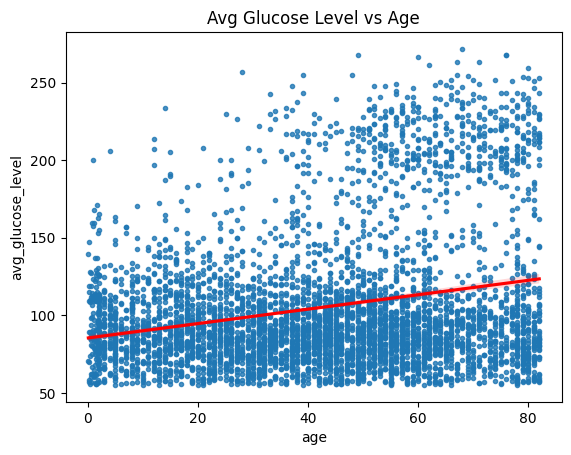

In [48]:
# Look at correlation between age and bmi
ax = sns.regplot(x='age', y='avg_glucose_level', data= df_stroke, line_kws = {'color' : 'red'}, marker='.').set(title = "Avg Glucose Level vs Age")


- There is a also a minor positive correlation between Avg Glucose Level and Age

##### Categorical Features

###### Histograms

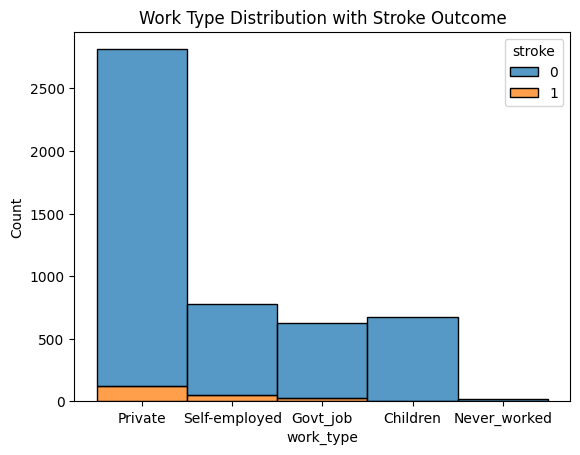

In [49]:
sns.histplot(data=df_stroke, x="work_type", hue="stroke", multiple="stack").set(title = "Work Type Distribution with Stroke Outcome")
plt.show();

- Stroke is more common in people who work

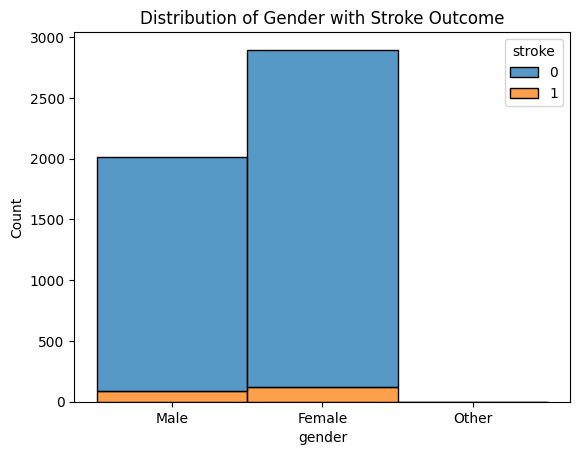

In [50]:
sns.histplot(data=df_stroke, x="gender", hue="stroke", multiple="stack").set(title = "Distribution of Gender with Stroke Outcome")
plt.show();

- Strokes are slightly more common in females than males in this data set.

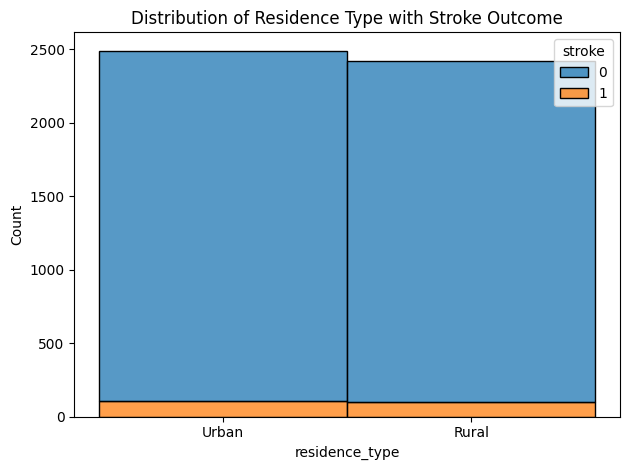

In [51]:
sns.histplot(data=df_stroke, x="residence_type", hue="stroke", multiple="stack").set(title = "Distribution of Residence Type with Stroke Outcome")
plt.tight_layout()
plt.show();

- Stroke outcomes are about the same when looking at residence type.

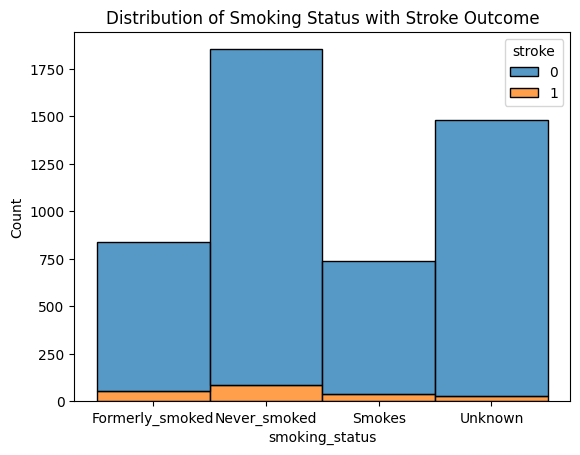

In [52]:
# seaborn histplot for smoking status with stroke outcome
sns.histplot(data=df_stroke, x="smoking_status", hue="stroke", multiple="stack").set(title = "Distribution of Smoking Status with Stroke Outcome")
plt.show();

- Stroke is occuring at about the same rate across people who formerly smoked, never smoked, people who smoke and the unknown category. Looking at this data it is a bit vexing that people who never smoked have a slightly higher rate of having strokes than the other values for smoking status.

#### Rows to be dropped

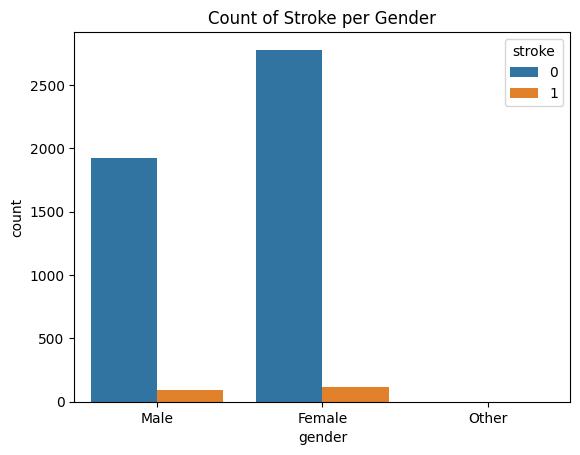

In [53]:
# Countplot with seaborn
ax = sns.countplot(data=df_stroke,x='gender', hue='stroke');
ax.set_title("Count of Stroke per Gender");

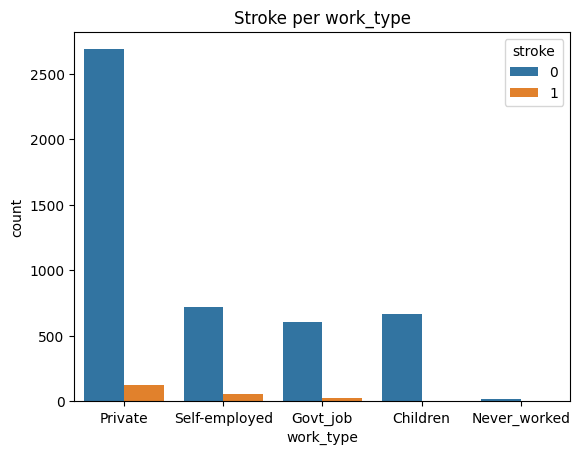

In [54]:
# Countplot with seaborn
ax = sns.countplot(data=df_stroke,x='work_type', hue='stroke');
ax.set_title("Stroke per work_type");

Drop the rows

In [55]:
df_stroke.drop(df_stroke[df_stroke['gender'] == 'Other'].index, inplace=True)

In [56]:
df_stroke.drop(df_stroke[df_stroke['work_type'] == 'Never_worked'].index, inplace=True)

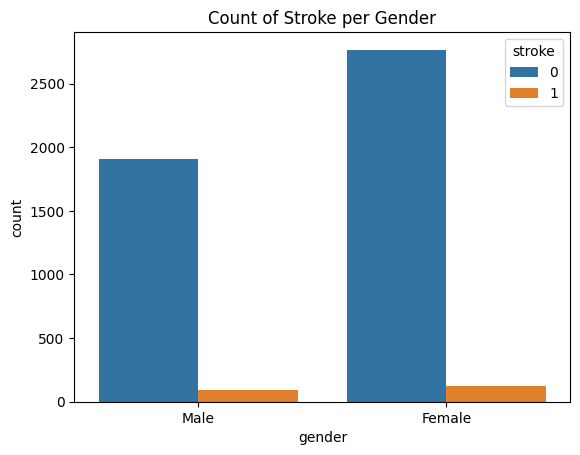

In [57]:
# Countplot with seaborn
ax = sns.countplot(data=df_stroke,x='gender', hue='stroke');
ax.set_title("Count of Stroke per Gender");

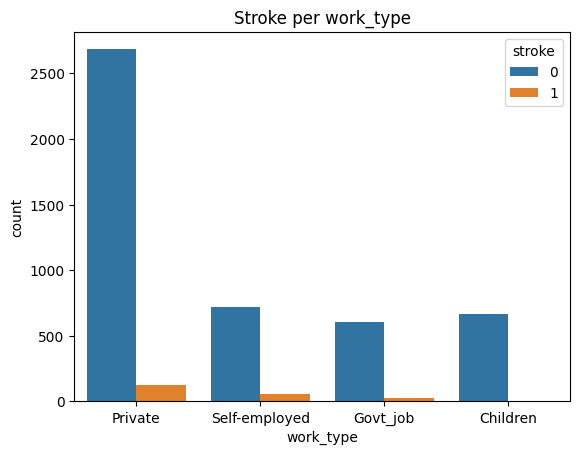

In [58]:
# Countplot with seaborn
ax = sns.countplot(data=df_stroke,x='work_type', hue='stroke');
ax.set_title("Stroke per work_type");

- Rows with Other for gender and Never worked for work type have been dropped

### Explanatory Data Analysis

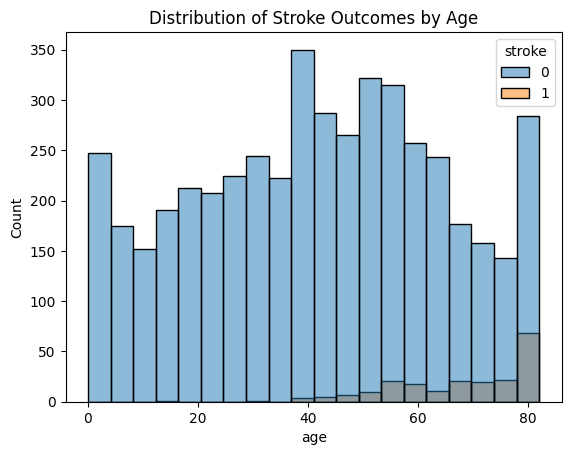

In [59]:
# create seaborn histogram for age distribution with stroke outcome as hue
ax = sns.histplot(data=df_stroke, x='age', edgecolor = 'black', hue='stroke')
ax.set_title("Distribution of Stroke Outcomes by Age");

- The strongest correlation in stroke outcomes is Age. Using the histogram above we can see that the number of instances of people who are having strokes gets higher around the age of 40 and gets increases as age increase.

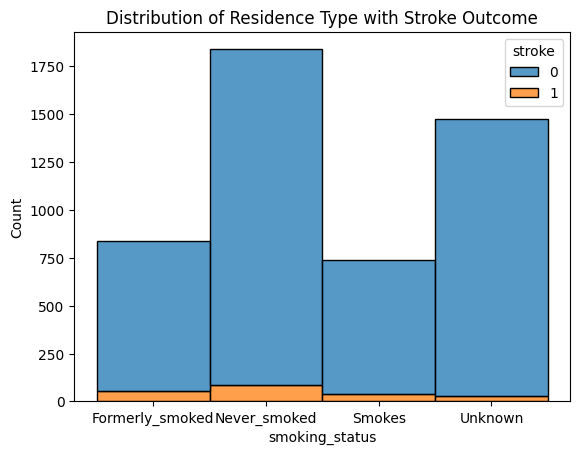

In [60]:
# seaborn histplot for smoking status with stroke outcome
sns.histplot(data=df_stroke, x="smoking_status", hue="stroke", multiple="stack").set(title = "Distribution of Residence Type with Stroke Outcome")
plt.show();

- This plot is very interesting. It is telling us that people who never smoked have a slightly a higher instance of having a stroke. While the stroke outcomes for people who never smoked is not a hugely significant amount over other values it does raise a question that deserves to be looked into. As the data analysis continues I would like to investigate this particular group of non smokers and compare and contrast other features that have led to them having or not having a stroke.

## Preprocessing for Machine Learning

#### Imports

In [61]:
# Preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Train-Test-Split 
from sklearn.model_selection import train_test_split

#### Create a copy of the dataframe

In [62]:
#Create a copy of the cleaned up dataframe for modeling
df_ml = df_stroke.copy()

In [63]:
df_ml.shape

(4886, 11)

In [64]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4886 non-null   object 
 1   age                4886 non-null   float64
 2   hypertension       4886 non-null   int64  
 3   heart_disease      4886 non-null   int64  
 4   ever_married       4886 non-null   int64  
 5   work_type          4886 non-null   object 
 6   residence_type     4886 non-null   object 
 7   avg_glucose_level  4886 non-null   float64
 8   bmi                4886 non-null   float64
 9   smoking_status     4886 non-null   object 
 10  stroke             4886 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 458.1+ KB


In [65]:
# Create features X and target y
y = df_ml['stroke']
X = df_ml.drop(columns = 'stroke')

Check the balance of the target

In [66]:
y.value_counts()

0    4677
1     209
Name: stroke, dtype: int64

* The target column is not balanced

#### Perform train test split with stratify due to imbalance

In [67]:
#Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [68]:
df_ml.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [79]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4886 non-null   object 
 1   age                4886 non-null   float64
 2   hypertension       4886 non-null   int64  
 3   heart_disease      4886 non-null   int64  
 4   ever_married       4886 non-null   int64  
 5   work_type          4886 non-null   object 
 6   residence_type     4886 non-null   object 
 7   avg_glucose_level  4886 non-null   float64
 8   bmi                4886 non-null   float64
 9   smoking_status     4886 non-null   object 
 10  stroke             4886 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 458.1+ KB


#### Column Selectors

##### Numerical

In [69]:
# Use StandardScaler to scale the numerical values
scaler = StandardScaler()

# Column Selector
num_selector = make_column_selector(dtype_include='number')

# Tuple
numeric_tuple = (scaler, num_selector)

##### Categorical (Nominal)

In [81]:
# Use one-hot-encoder on the nominal columns
ohe = OneHotEncoder(sparse=False, handle_unknown = 'ignore')

# Column Selector
nominal_cols = ['gender', 'ever_married', 'work_type','residence_type', 'smoking_status']

# Tuple
nominal_tuple = (ohe, nominal_cols)

##### Categorical(Ordinal)

- There are no ordinal column values

#### Create a Preprocessor using column transformer

In [82]:
# instantiate column transformer
preprocessor = make_column_transformer(numeric_tuple, nominal_tuple, remainder='passthrough', verbose_feature_names_out= False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1255245390>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['gender', 'ever_married', 'work_type',
                                  'residence_type', 'smoking_status'])],
                  verbose_feature_names_out=False)

## Modeling

In [105]:
#import
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (ConfusionMatrixDisplay, RocCurveDisplay, classification_report, accuracy_score, f1_score, precision_score, recall_score)

### Logistic Regression Model

#### Default Logistic Regression Model

In [84]:
# default logistic regression model
lr = LogisticRegression(random_state=42)
def_lr_pipe = make_pipeline(preprocessor, lr)
# fit default lr model
def_lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1255245390>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

#### Tuned Logistic Regression Model

In [85]:
# display parameters to tune model
def_lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f1255245390>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['gender', 'ever_married', 'work_type',
                                     'residence_type', 'smoking_status'])],
                     verbose_feature_names_out=False)),
  ('logisticregression', LogisticRegression(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector

In [86]:
# instantiate a tuned logistic regresion model using parameters
lr = LogisticRegression(solver='liblinear', random_state=42)
lr_pipe = make_pipeline(preprocessor, lr)
# create params grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
              'logisticregression__penalty': ['l1', 'l2']}

In [87]:
# use gridsearch cv to tune model
lr_grid_search = GridSearchCV(lr_pipe, param_grid)

In [88]:
# fit gridsearch tuned logistic regression model
lr_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1255245390>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['gender',
                                                                          'ever_married',
                                                                          'work_type',
                                                                          'residence_type',
                                                                          'smoking_status'])],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1.0, 10, 100],
                         'logisticregression__penalty': ['l1', 'l2']})

In [89]:
# get best parameters from gridsearch
lr_grid_search.best_params_

{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1'}

In [90]:
#pull the best parameters to use
tuned_lr = lr_grid_search.best_estimator_

# fit the best model on the training set
tuned_lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1254ca0af0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(C=0.01, penalty='l1', random_state=42,
                                    solver='liblinear'))])

#### Evalauation of Tuned Logistic Regression Model

In [91]:
## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data', 
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5): 
                             
    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]
    
    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
                normalize=normalize, cmap=cmap,              
                ax=axes[0])    
    
    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3507
           1       0.00      0.00      0.00       157

    accuracy                           0.96      3664
   macro avg       0.48      0.50      0.49      3664
weighted avg       0.92      0.96      0.94      3664



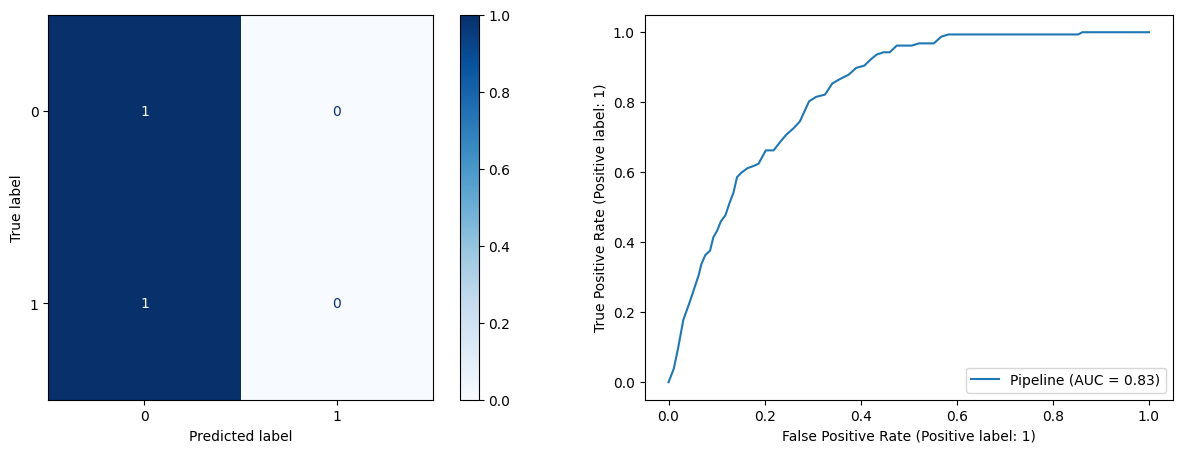

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1170
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1222
   macro avg       0.48      0.50      0.49      1222
weighted avg       0.92      0.96      0.94      1222



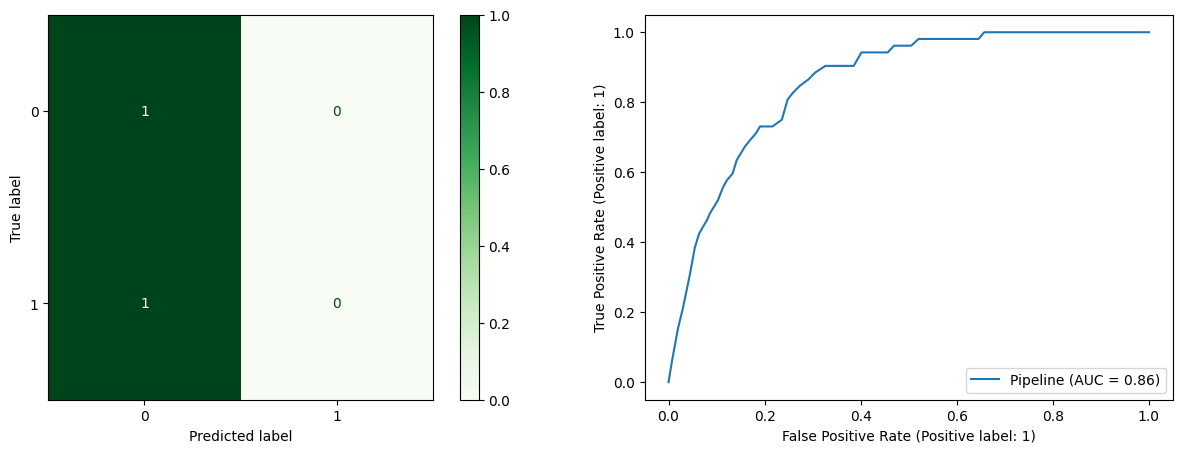

In [92]:
# call custom function to display metrics for training set
classification_metrics(tuned_lr, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
# call custom function to display metrics for testing set
classification_metrics(tuned_lr, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

### KNN Model

#### Default KNN Model

In [93]:
# instantiate a default KNN model
knn = KNeighborsClassifier()
def_knn_pipe = make_pipeline(preprocessor, knn)
# fit default KNN model on training data
def_knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1255245390>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

#### Tuned KNN Model

In [94]:
# get the parameters of the KNN pipeline
def_knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f1255245390>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['gender', 'ever_married', 'work_type',
                                     'residence_type', 'smoking_status'])],
                     verbose_feature_names_out=False)),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 

In [95]:
# create params grid for grid search 
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [96]:
# use gridsearchcv to get the best parameters
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid)
# fit KNN gridsearch model on training data
knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}


In [97]:
# create KNN model with best parameters
tuned_knn = knn_pipe_gs.best_estimator_
# fit the gridsearch tuned model on training data
tuned_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f125506cbe0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=8, p=1))])

#### Evaluation of Tuned KNN Model

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3507
           1       0.00      0.00      0.00       157

    accuracy                           0.96      3664
   macro avg       0.48      0.50      0.49      3664
weighted avg       0.92      0.96      0.94      3664



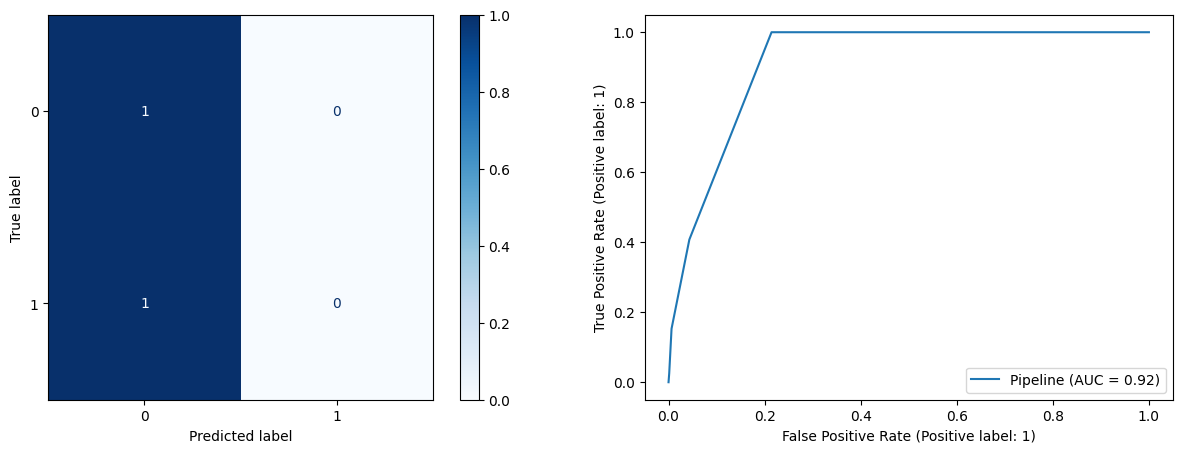

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1170
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1222
   macro avg       0.48      0.50      0.49      1222
weighted avg       0.92      0.96      0.94      1222



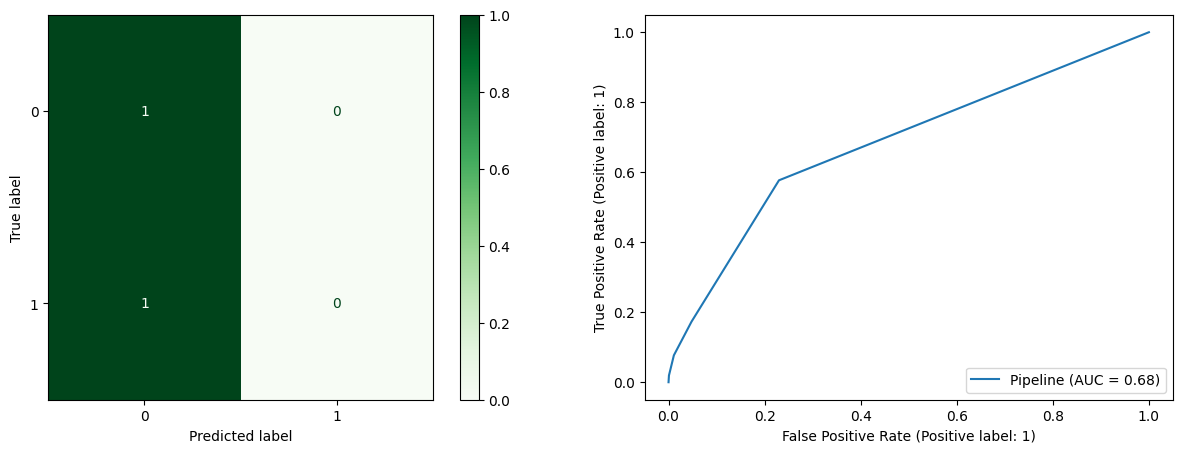

In [98]:
# call custom function to display metrics for training set
classification_metrics(tuned_knn, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
# call custom function to display metrics for test set
classification_metrics(tuned_knn, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

### Random Forest Model

#### Default Random Forest Model

In [99]:
# instantiate a default random forest classifier model
rf = RandomForestClassifier(random_state=42)
# create pipeline
def_rf_pipe = make_pipeline(preprocessor, rf)
# fit the default random forest model on the train data
def_rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1255245390>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

#### Tuned Random Forest Model

In [100]:
# get parameters for KNN model
def_rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f1255245390>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['gender', 'ever_married', 'work_type',
                                     'residence_type', 'smoking_status'])],
                     verbose_feature_names_out=False)),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_

In [101]:
# create a param grid for gridsearch to use
rf_param_grid = {'randomforestclassifier__max_depth': range(1,10),
              'randomforestclassifier__n_estimators': [1,5,10]}

In [102]:
# use gridsearchcv to fine best parameters for random forest modelk
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe_gs = GridSearchCV(rf_pipe, rf_param_grid)
rf_pipe_gs.fit(X_train, y_train)
print('Best Random Forest Parameters:')
print(rf_pipe_gs.best_params_)
rf_best_pipe = rf_pipe_gs.best_estimator_

Best Random Forest Parameters:
{'randomforestclassifier__max_depth': 1, 'randomforestclassifier__n_estimators': 1}


In [103]:
rf_best_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f12555ae050>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=1, n_estimators=1,
                                        random_state=42))])

#### Evaluation of Tuned Random Forest Model

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3507
           1       0.00      0.00      0.00       157

    accuracy                           0.96      3664
   macro avg       0.48      0.50      0.49      3664
weighted avg       0.92      0.96      0.94      3664



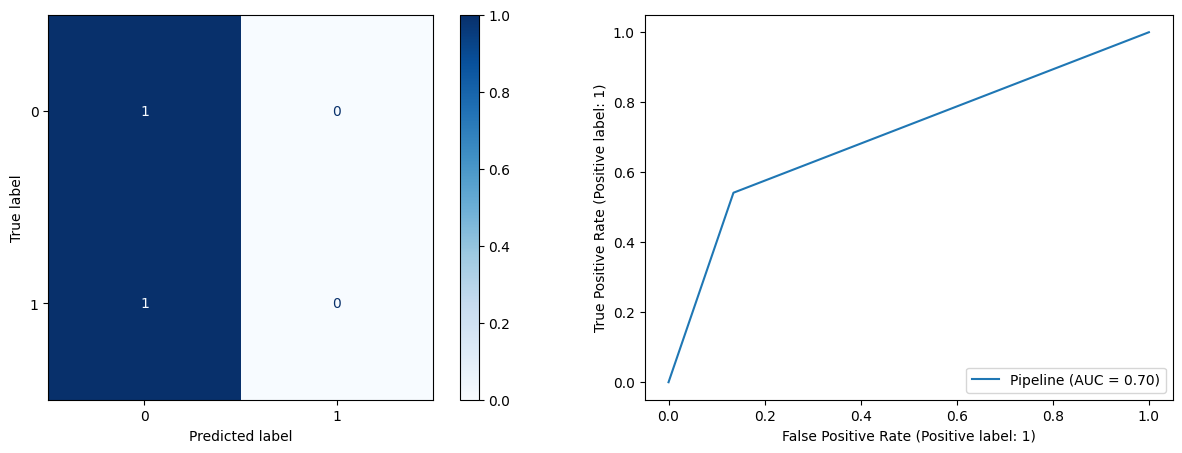

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1170
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1222
   macro avg       0.48      0.50      0.49      1222
weighted avg       0.92      0.96      0.94      1222



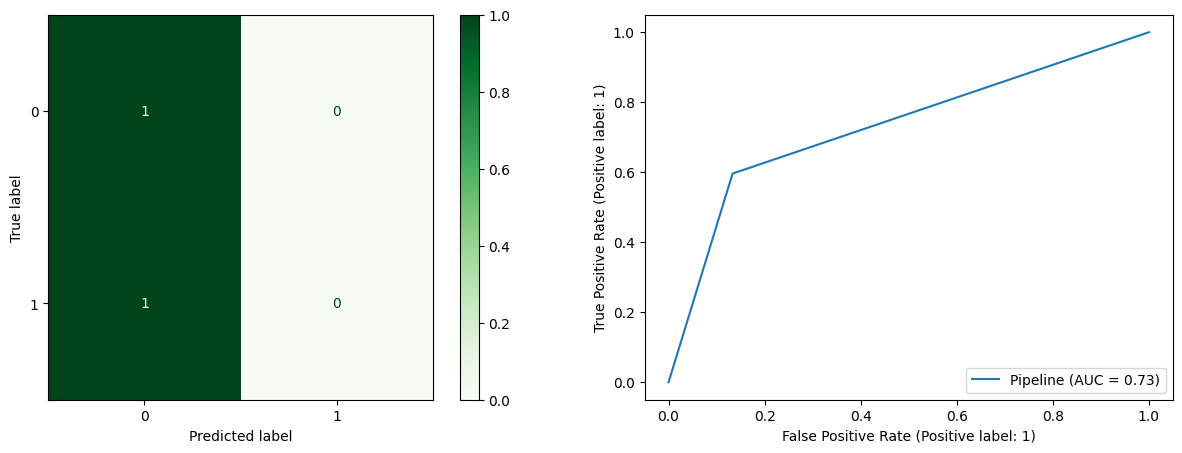

In [104]:
# call the custom function to display metrics for training data
classification_metrics(rf_best_pipe, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
# call the custom function to display metrics for test data
classification_metrics(rf_best_pipe, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')